## MNIST NUMBER RECOGNITION PROJECT
<br>
KENNEDY, THOMAS R


In [2]:
# IMPORTS

# STANDARD + IMG HELP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# SKLEARN

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score

# TENSORFLOW AND KERAS

import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


# EDA!
  

In [3]:
# READ IN THE DATA

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
# CHECK TRAIN HEAD

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# CHECK TRAIN TAIL

train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# CREATE MY TRAIN SET

Y_train = train['label']
X_train = train.drop(labels = ["label"],axis = 1)


In [7]:
# I'D LIKE TO VIZUALIZE A SAMPLE IMAGE, LET'S SEE WHAT SHAPE THE DATA IS IN

print(X_train.shape)

if X_train.shape != (42000, 28, 28):
    print('SORRY! I CAN\'T HELP YOU IN THIS SHAPE')


(42000, 784)
SORRY! I CAN'T HELP YOU IN THIS SHAPE


In [8]:
# YOU HEARD THE DATA.... I'LL NEED TO RESHAPE THE ARRAYS FOR THAT

X_train = X_train.values.reshape(-1,28,28)
test = test.values.reshape(-1,28,28)

print(X_train.shape)

if X_train.shape == (42000, 28, 28):
    print('THAT\'S BETTER')

(42000, 28, 28)
THAT'S BETTER


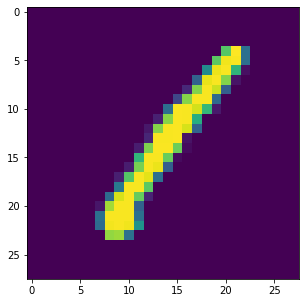

In [9]:
# YOU'RE WELCOME... SO WHAT DO THESE IMAGES LOOK LIKE?

plt.figure(figsize = (10,5))
plt.imshow(X_train[0])
plt.show()

In [10]:
# WHAT VALUES DO WE HAVE INCLUDED?

print(sorted(Y_train.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


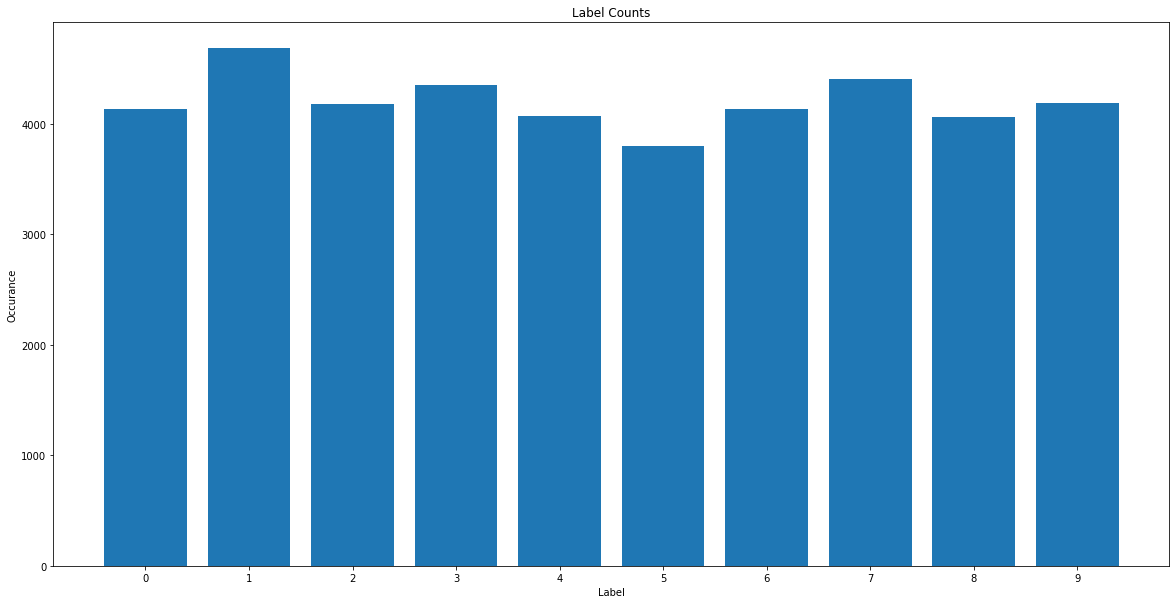

In [11]:
# HOW MANY OF EACH VALUE?

counts = Y_train.value_counts()
plt.figure(figsize = (20,10))
plt.bar(counts.index, counts)
plt.xticks(ticks = counts.index, labels = counts.index)
plt.title('Label Counts')
plt.xlabel('Label')
plt.ylabel('Occurance')
plt.show()

## CONVOLUTIONAL NEURAL NET


In [17]:
# RESHAPE...

X_train = X_train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

In [18]:
# NORMALIZE THE TRAINING AND TEST DATA

X_train = X_train / 255
test = test / 255

In [19]:
# KERAS ONEHOT VECTOR

Y_train = to_categorical(Y_train, num_classes = 10)

In [20]:
# BUILDING THE CNN

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.50))


model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.50))


model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [21]:
# ADAM OPTIMIZER

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [22]:
# COMPILE THE MODEL

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [23]:
# SET THE EPOCHS AND BATCH SIZE

epochs = 300

batch_size = 100

In [24]:
# FIT THE MODEL

model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs)
          

Epoch 1/300
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
420/420 [==============================] - 107s 256ms/step - loss: 1.1700 - accuracy: 0.5908
Epoch 2/300
420/420 [==============================] - 108s 258ms/step - loss: 0.3093 - accuracy: 0.9032
Epoch 3/300
420/420 [==============================] - 90s 215ms/step - loss: 0.2028 - accuracy: 0.9386
Epoch 4/300
420/420 [==============================] - 85s 203ms

420/420 [==============================] - 89s 213ms/step - loss: 0.0050 - accuracy: 0.9983
Epoch 148/300
420/420 [==============================] - 89s 211ms/step - loss: 0.0055 - accuracy: 0.9982
Epoch 149/300
420/420 [==============================] - 89s 211ms/step - loss: 0.0041 - accuracy: 0.9987
Epoch 150/300
420/420 [==============================] - 93s 221ms/step - loss: 0.0049 - accuracy: 0.9983
Epoch 151/300
420/420 [==============================] - 93s 221ms/step - loss: 0.0036 - accuracy: 0.9987
Epoch 152/300
420/420 [==============================] - 92s 220ms/step - loss: 0.0050 - accuracy: 0.9985
Epoch 153/300
420/420 [==============================] - 90s 214ms/step - loss: 0.0043 - accuracy: 0.9987
Epoch 154/300
420/420 [==============================] - 94s 223ms/step - loss: 0.0039 - accuracy: 0.9988
Epoch 155/300
420/420 [==============================] - 93s 221ms/step - loss: 0.0046 - accuracy: 0.9986
Epoch 156/300
420/420 [==============================] - 93s

In [25]:
# MAKE OUR PREDICTIONS AND GET LABELS

Y_pred = model.predict(test)
Y_pred_label = [np.argmax(i) for i in Y_pred]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [26]:
prediction = pd.DataFrame(Y_pred_label, columns=['Label'])
prediction.index += 1
prediction.index.name = 'ImageId'

In [27]:
prediction

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3
...,...
27996,9
27997,7
27998,3


In [28]:
prediction.to_csv('kaggle_mnist.csv')